In [145]:
#importing packages
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools

#using pandas to import the training data
processeddata=pd.read_csv(r'C:\\Users\\diyas\\Desktop\\SEM5\\Data_Analytics\\Project\\ModelBehaviour-master\\preprocessed_wosq.csv', index_col='Id')

In [146]:
def confusion_matrix_rep(y_test,y_pred,class_names,model):
    print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))
    print("precision:",metrics.precision_score(y_test, y_pred,average='macro'))
    cm=confusion_matrix(y_test, y_pred, labels=class_names)
    print("confusion matrix:\n\n" ,cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    plt.title('Confusion matrix for '+model+" model", y=-0.5)
    fmt = 'd'

    # write the number of predictions in each bucket
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

    # if background is dark, use a white number, and vice-versa
        plt.text(j, i, format(cm[i, j], fmt),
         horizontalalignment="center",
         color="white" if cm[i, j] > thresh else "black")
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [147]:
#without upsampling
di = {1: "extreme poverty", 2: "moderate poverty",3:"vulnerable households",4:"non vulnerable households"}
processeddata['Target']=processeddata['Target'].map(di)
class_names=processeddata.Target.unique()
a=processeddata
class_names=list(class_names)
col1=list(processeddata.columns)
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)
col1=list(filter(lambda a: a not in data_notnum , col1))
X_sq = processeddata[col1] # features for dataset which includes squared parameters
y_sq = processeddata.Target #target


Confusion matrix
F1: 0.8762296685588992
precision: 0.9356802712901151
confusion matrix:

 [[2366    7    5    2]
 [ 102  526    2   13]
 [ 104   15  354    6]
 [  62    9    1  249]]


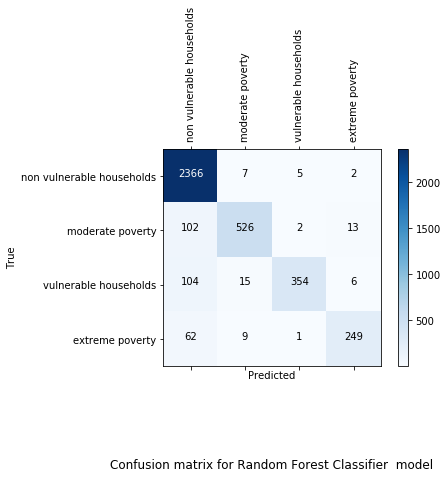

In [148]:
# splitting dataset to train and test, taking proportion as 60 40 for now, as an initial checkpoint
X_train, X_test, y_train, y_test = train_test_split(X_sq, y_sq, test_size=0.4, random_state=1)

regressor = RandomForestClassifier(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)  
y_pred= regressor.predict(X_test)

#performance metrics for random forest classifier
#printing confusion matrix
print('Confusion matrix before upsampling')
confusion_matrix_rep(y_test,y_pred,class_names,"Random Forest Classifier ")


In [149]:
processeddata=pd.read_csv(r'C:\\Users\\diyas\\Desktop\\SEM5\\Data_Analytics\\Project\\ModelBehaviour-master\\preprocessed_wosq.csv', index_col='Id')
#data balancing(upsampling)
class_names=processeddata.Target.unique()
class_names=list(class_names)
col=list(processeddata.columns)
data_notnum = list(processeddata.select_dtypes(exclude=[np.number]).columns)
col=list(filter(lambda a: a not in data_notnum, col))
col.pop(-1)
x=processeddata[col]
y=processeddata.Target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=1)
train = pd.concat([x_train, y_train], axis=1)
#Seperating the majority and minority classes
#in this case the majority class is 4 (non vulnerable households)
majority=train[train.Target==4]
minority1=train[train.Target==1]
minority2=train[train.Target==2]
minority3=train[train.Target==3]
minority_upsampled1=resample(minority1, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled2=resample(minority2, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled3=resample(minority3, replace=True, n_samples=len(majority), random_state=1)
upsampled=pd.concat([majority,minority_upsampled1,minority_upsampled2,minority_upsampled3])
#print("Values before upsampling \n", train.Target.value_counts())
#print("Values after upsampling\n", upsampled.Target.value_counts())

In [150]:
#using Random Forest Classifier after upsampling
y_train=upsampled.Target
x_train=upsampled.drop("Target",axis=1)

In [151]:
#plotting a graph to find optimum value for number of decisions(n_estimators =?) trees to be used
l=[]
for i in range(1,150):
    regressor = RandomForestClassifier(n_estimators = i, random_state = 0)
    regressor.fit(x_train, y_train)  
    y_pred= regressor.predict(x_test)
    l.append(accuracy_score(y_test, y_pred))

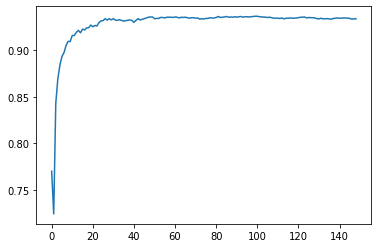

In [152]:
plt.plot(l)
#can be observed that n_estimators=50 gives approximately highest accuracy score 

In [153]:
# create classifier object with n_estimators = 50
# fit the model with x and y data 
regressor = RandomForestClassifier(n_estimators = 50, random_state = 0)
regressor.fit(x_train, y_train)  
y_pred= regressor.predict(x_test)


Confusion matrix
F1: 0.905636065005876
precision: 0.9345520574531307
confusion matrix:

 [[2354   14   11    1]
 [  69  551    5   18]
 [  57    9  406    7]
 [  40    8    7  266]]


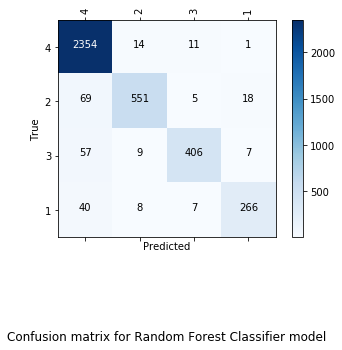

In [154]:
#performance metrics for random forest classifier

#printing confusion matrix
print('Confusion matrix')
confusion_matrix_rep(y_test,y_pred,class_names,"Random Forest Classifier")